# Test PPP, qPlanner, and SFA.py

memo
- repo location
    - (kiyoyabe) /work/kiyoyabe/obsproc/e2e/src/repo
    - (pfs) /work/pfs/obsproc/e2e/repo

In [1]:
#%matplotlib widget
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams,ticker,gridspec
import random
import time
from IPython.display import clear_output
from sklearn.neighbors import KernelDensity
import glob
import seaborn as sns
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
import multiprocessing
import collections
from shapely.geometry import Point
from matplotlib.path import Path
import colorcet as cc
from itertools import chain
import sys
from logzero import logger
from IPython.display import clear_output

#below for netflow
from __future__ import print_function
import ets_fiber_assigner.netflow as nf
from ics.cobraOps.Bench import Bench
from ics.cobraOps.TargetGroup import TargetGroup
from ics.cobraOps.CobrasCalibrationProduct import CobrasCalibrationProduct
from ics.cobraOps.CollisionSimulator import CollisionSimulator
from ics.cobraOps.cobraConstants import NULL_TARGET_POSITION, NULL_TARGET_ID
from ics.cobraOps import plotUtils
from collections import defaultdict

np.random.seed(1)

In [2]:
'''Change the directory name if you like. 
If you make a new directory, copy /work/kiyoyabe/obsproc/e2e/test/20230615/sample_inuse to the directory
'''

workDir='/home/kiyoyabe/obsproc/e2e/notebooks/test_ppp+qplan+sfa'
repoDir='/work/kiyoyabe/obsproc/e2e/src/repo'

sys.path.append(os.path.join(workDir, 'utils'))
import generatePfsDesign

config='config.toml'

### Run PPP

In [4]:
gpd = generatePfsDesign.GeneratePfsDesign(config, workDir, repoDir)

######### Read sample
#There are    20 proposals loaded.
  #  128593 targets require the LOW resolution
  #    3957 targets require the MEDIUM resolution
######### Read sample DONE! (takes 2.465 sec)
######### Determine pointing centers
#There are 128593 targets, they are grouped into 17 clusters.
#There are    40 pointings determined.
######### Determine pointing centers DONE! (takes 331.837 sec)
######### Start running netflow to assign fibers
#There are    40 pointings, they are grouped into     2 clusters.
#Now is Group   1, it contains    18 pointings, and   1512 targets.
Set parameter Presolve to value 1
Set parameter Method to value 4
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.8
Set parameter MIPGap to value 0.01
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
  exposure 2
Calculating visibilities
adding constraints
adding collision constraints
adding fo

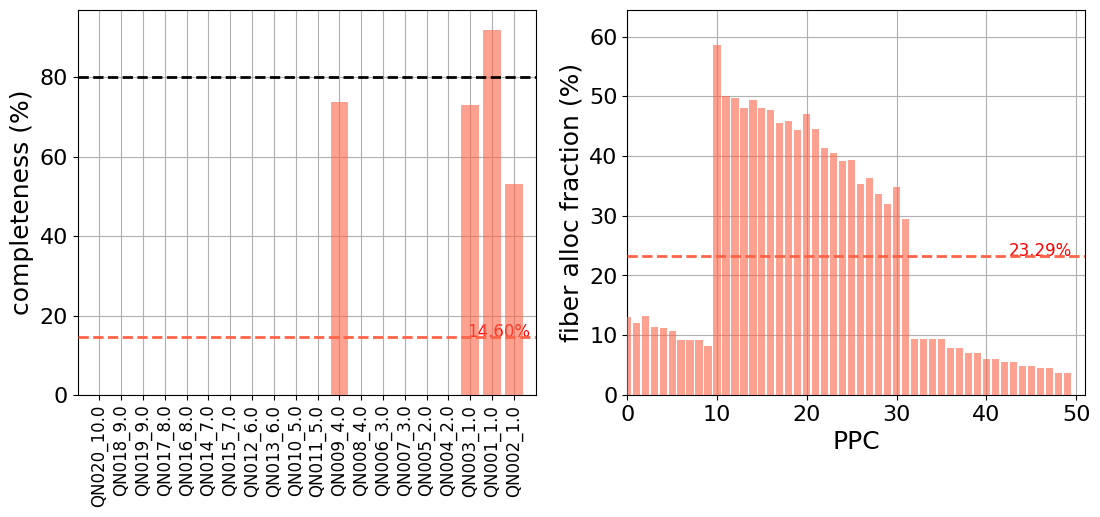

In [9]:
n_pccs_l = 40
n_nccs_m = 10
#gpd.runPPP(n_pccs_l, n_nccs_m, show_plots=True)

### Run queuePlanner

In [11]:
#obs_dates = ["2023-05-20", "2023-05-21", "2023-05-22", "2023-05-23"]
#obs_dates = ["2023-09-20", "2023-09-21"]
obs_dates = ["2023-12-20", "2023-12-21", "2023-12-22"]
gpd.runQPlan(obs_dates)

{'S24B-QN017': S24B-QN017}
1:31:26.62896000000032
1:31:26.62896000000032
0:10:31.816920000000195
0:10:31.816920000000195
1:31:26.62896000000032
1:31:26.62896000000032
0:23:42.142020000000144
0:23:42.142020000000144
2:15:29.489112000000617
2:15:29.489112000000617
0:43:31.96660799999961
0:43:31.96660799999961
0:28:8.538491999999493
0:28:8.538491999999493
1:50:27.225600000000156
1:50:27.225600000000156
0:10:44.23756800000014
0:10:44.23756800000014
46:5:25.652688000008084
42:25:58.14131520000956
45:19:42.42115200000626
44:6:33.250694400023804
43:11:41.37285120001138
41:40:14.909779200007733
41:58:32.20239360000335
46:5:25.652688000008084
42:35:6.787622400020155
45:56:17.006380800023067
41:21:57.61716480001212
44:6:33.250694400023804
42:35:6.787622400020155
43:29:58.665465600006996
40:45:23.03193600002089
42:35:6.787622400020155
40:36:14.385628800010295
45:3:8.12068560000057
41:24:39.46196879999263
43:13:53.79132720000939
45:39:32.89713839999763
44:17:37.150119600004246
3:48:49.523759999998

### Run SFA.py (reconfigure_fibers_ppp)

In [25]:
#data = np.load(os.path.join(workDir, 'output/obj_allo_tot.npy'), allow_pickle=True)
#data[0]

In [26]:
#t = Table.read(os.path.join(workDir, 'output/obList.ecsv'))
#t[:3]

In [18]:
gpd.runSFA(clearOutput=True)

[I 230926 16:00:44 dbutils:200] Query string for fluxstd: 
    SELECT *
        FROM fluxstd
        WHERE q3c_radial_query(ra, dec, 146.466915348, 3.30109948, 1.105)
        
            AND prob_f_star BETWEEN 0.5 AND 1.0
            AND psf_mag_g BETWEEN 14.0 AND 19.0
            AND (version = '2.1');
[I 230926 16:00:44 dbutils:205] Time spent for querying (s): 0.039
[I 230926 16:00:44 dbutils:210] Fetched target DataFrame: 
    Empty DataFrame
    Columns: [fluxstd_id, obj_id, ra, dec, epoch, parallax, parallax_error, pmra, pmra_error, pmdec, pmdec_error, tract, patch, target_type_id, input_catalog_id, psf_mag_g, psf_mag_r, psf_mag_i, psf_mag_z, psf_mag_y, psf_mag_j, psf_mag_error_g, psf_mag_error_r, psf_mag_error_i, psf_mag_error_z, psf_mag_error_y, psf_mag_error_j, psf_flux_g, psf_flux_r, psf_flux_i, psf_flux_z, psf_flux_y, psf_flux_j, psf_flux_error_g, psf_flux_error_r, psf_flux_error_i, psf_flux_error_z, psf_flux_error_y, psf_flux_error_j, filter_g, filter_r, filter_i, filter_

Cobras with zero centers: 0
Cobras with zero link lengths: 0
Cobras with too long link lengths: 0
Number of cobras: 2394
Set parameter Presolve to value 1
Set parameter Method to value 0
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.6
Set parameter MIPGap to value 0.005
Set parameter PreSOS2Encoding to value 0
Set parameter PreSOS1Encoding to value 0
Set parameter Threads to value 4
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
solving the problem
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7542 32-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 64 physical cores, 128 logical processors, using up to 4 threads

Optimize a model with 694 rows, 800 columns and 1580 nonzeros
Model fingerprint: 0x0f35676a
Variable types: 1 continuous, 799 integer (602 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
 

ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range


Checking for trajectory collisions


ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = True
INFO:engineer:Move theta arms CW and phi arms CCW to the hard stops
INFO:cobraCoach:home cobras: theta=10000, phi=-5000
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [1782], 6 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = False
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
ERROR:pfi:Some phi

trajectory collisions found: 6
Set parameter Presolve to value 1
Set parameter Method to value 0
Set parameter DegenMoves to value 0
Set parameter Heuristics to value 0.6
Set parameter MIPGap to value 0.005
Set parameter PreSOS2Encoding to value 0
Set parameter PreSOS1Encoding to value 0
Set parameter Threads to value 4
Creating network topology
  exposure 1
Calculating visibilities
adding constraints
adding collision constraints
adding forbidden pair constraints
solving the problem
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (linux64)

CPU model: AMD EPYC 7542 32-Core Processor, instruction set [SSE2|AVX|AVX2]
Thread count: 64 physical cores, 128 logical processors, using up to 4 threads

Optimize a model with 700 rows, 800 columns and 1588 nonzeros
Model fingerprint: 0x0f93256a
Variable types: 1 continuous, 799 integer (602 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e-02, 1e+12]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+

ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = True
INFO:engineer:Move theta arms CW and phi arms CCW to the hard stops
INFO:cobraCoach:home cobras: theta=10000, phi=-5000


Checking for trajectory collisions


ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [1782], 6 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:Move theta arms to angle=[360. 360. 360. ... 360. 360. 360.] degree
INFO:engineer:Move phi arms to angle=[11.09 24.48 13.06 ...  8.43 11.99  9.16] degree
INFO:engineer:Checking passed homed argument = False
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [   0    1    2 ... 2391 2392 2393], 7 left
ERROR:pfi:Some phi angles are out of range
INFO:engineer:done: [1096], 6 left
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
INFO:cobraCoach:all theta and phi steps are 0, not moving!
ERROR:pfi:Some theta angles are out of range
ERROR:pfi:Some phi angles are out of range
ERROR:pfi:Some phi angles are out of range

trajectory collisions found: 0
Telescope elevation is set to 45.3 degrees                 from the pointing center (146.46692, 3.30110) and observing                     time 2023-12-21T11:19:41Z at Subaru Telescope


[I 230926 16:00:58 reconfigure_fibers_ppp:605] pfsDesign file pfsDesign-0x567a2f3265cf3e25.fits for Point_M_56001738 is created in the /home/kiyoyabe/obsproc/e2e/notebooks/test_ppp+qplan+sfa/output/design directory.
[I 230926 16:00:58 reconfigure_fibers_ppp:608] Number of SCIENCE fibers: 176
[I 230926 16:00:58 reconfigure_fibers_ppp:613] Number of FLUXSTD fibers: 0
[I 230926 16:00:58 reconfigure_fibers_ppp:618] Number of SKY fibers: 0
[I 230926 16:00:58 reconfigure_fibers_ppp:621] Number of AG stars: 7
[I 230926 16:00:58 reconfigure_fibers_ppp:622] Observation Time: 2023-12-21T11:19:41Z


## check results

In [21]:
df = pd.read_csv(os.path.join(workDir, 'output/summary_reconfigure_ppp-ppp+qplan_outout.csv'))
df[:5]

,pointing,design_filename,observation_time
0,Point_L_33932834,pfsDesign-0x2556ffaf91ff5b7d.fits,2023-12-23T08:00:08Z
1,Point_L_34857184,pfsDesign-0x1a4ba9b47d965cbf.fits,2023-12-23T05:30:02Z
2,Point_L_35532024,pfsDesign-0x1a4ba9b47d965cbf.fits,2023-12-23T05:55:03Z
3,Point_L_36919674,pfsDesign-0x5589c220b1e833c1.fits,2023-12-23T06:20:04Z
4,Point_L_37379478,pfsDesign-0x5589c220b1e833c1.fits,2023-12-23T06:45:05Z


In [22]:
pointings = df['pointing']
designs = df['design_filename']
obstimes = df['observation_time']

In [24]:
len(np.unique(pointings))

41